In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import seaborn as sns
import pickle
from scripts.plot_marginals import plot_dataframe_marginal_comparison
from scripts.base_clf import run_classification
from scripts.base_lr import run_logistic_regression_on_2d
from scripts.constants import COLUMNS_FOR_DATASET
from src.utils.data_utils import transform_for_classification
from pprint import pprint

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
SYN_DATA_FOLDER = os.path.join(CURRENT_FOLDER, "data", "synt_datasets")
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [4]:
file = open(os.path.join(SYN_DATA_FOLDER, "synthetic_dataset_original_model_binary4d_01e_A+D-B+D-C+D.pickle"), "rb")
synt_data_obj = pickle.load(file)
file.close()

In [5]:
binary3d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary3d.csv'))
binary3d_test_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary3d_test.csv'))
binary4d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary4d.csv'))
binary4d_test_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary4d_test.csv'))

In [6]:
np.sum(binary3d_df['C'] == 1) / len(binary3d_df['C'])

0.61485

In [7]:
np.sum(binary3d_test_df['C'] == 1) / len(binary3d_test_df['C'])

0.61612

In [8]:
np.sum(binary4d_df['D'] == 1) / len(binary4d_df['D'])

0.76634

In [9]:
np.sum(binary4d_test_df['D'] == 1) / len(binary4d_test_df['D'])

0.76668

In [10]:
def numpy_tensor_to_dataframe_list(np_tensor, columns=None):
    # Assuming tensor shape (n_dataframes, n_rows, n_features)
    # Produce list with n_dataframes elements with array shaped (n_rows, n_features)
    
    df_list = []
        
    for i in range(np_tensor.shape[0]):
        array_slice = np_tensor[i]
        df = pd.DataFrame(array_slice, columns=columns)
        df_list.append(df)
        
    return df_list

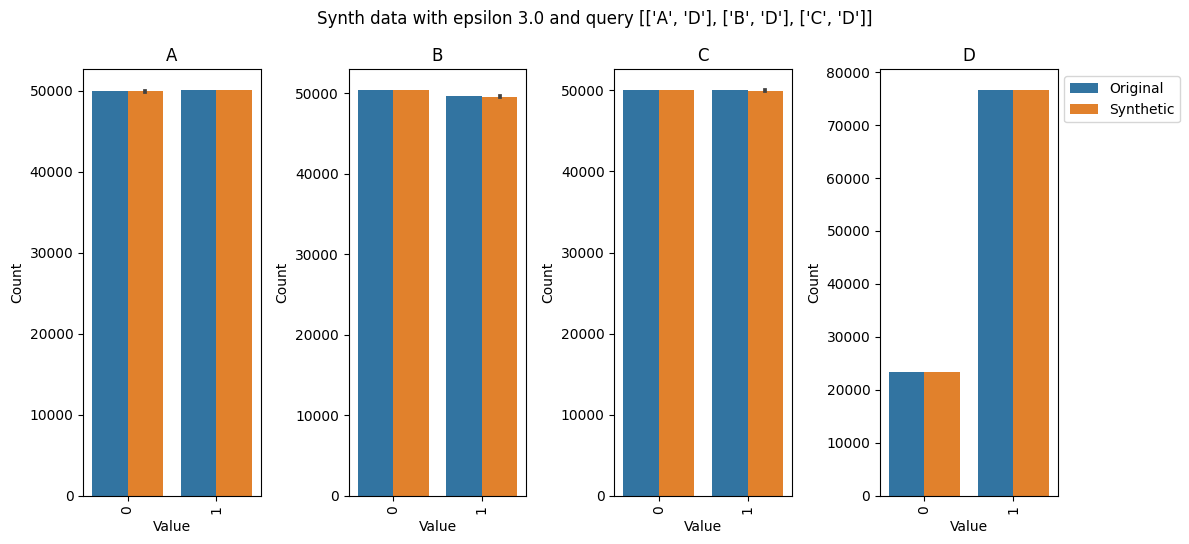

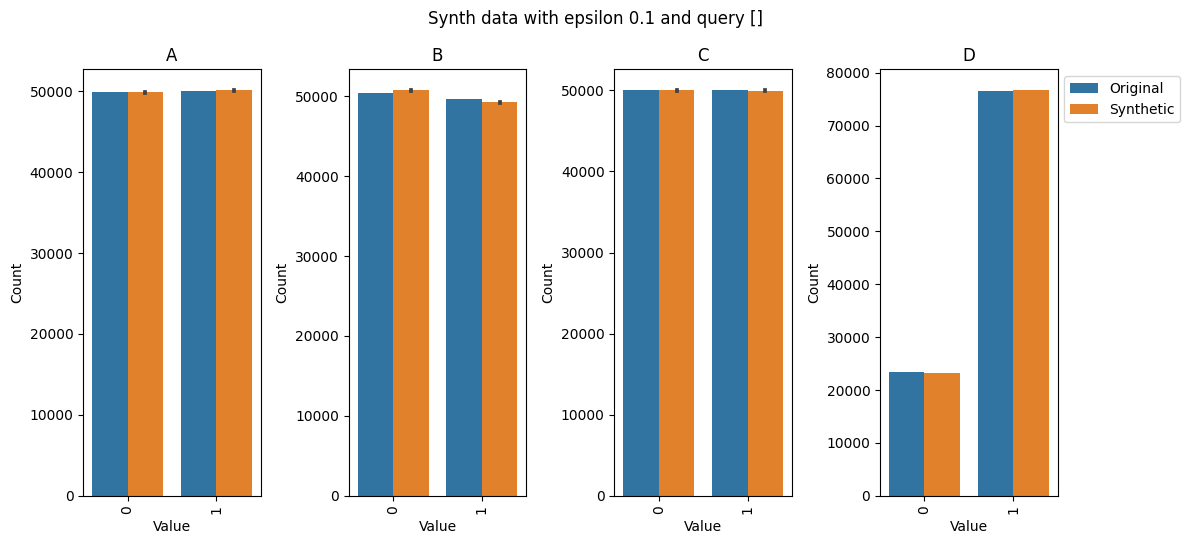

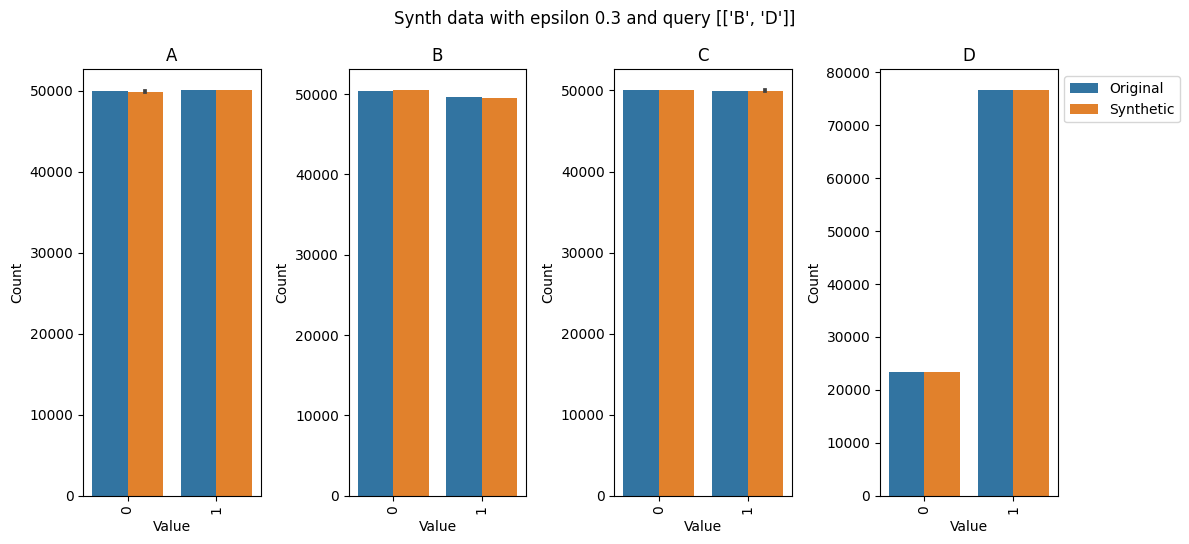

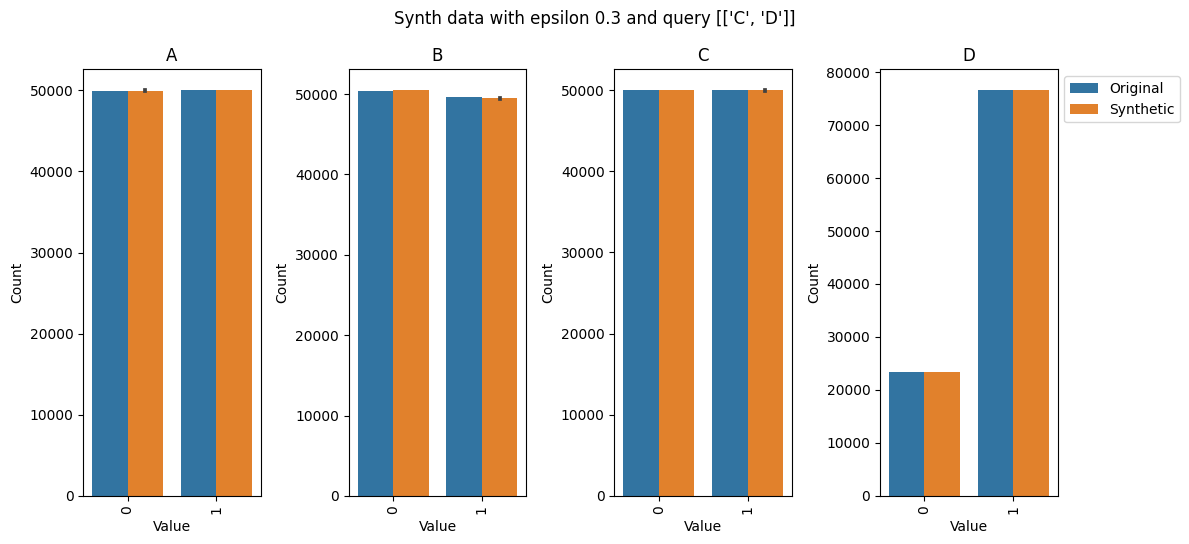

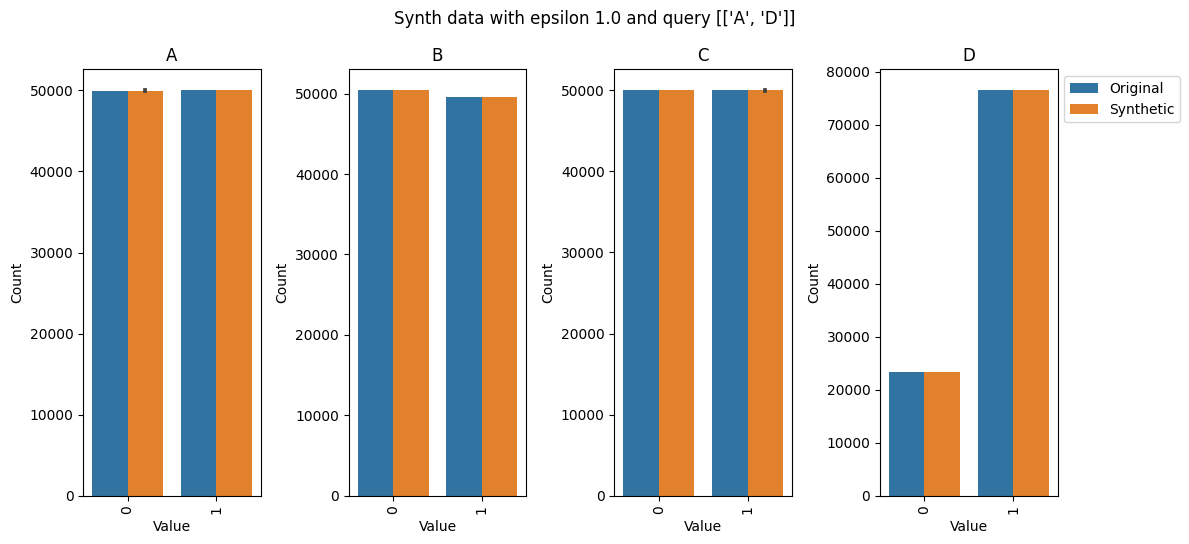

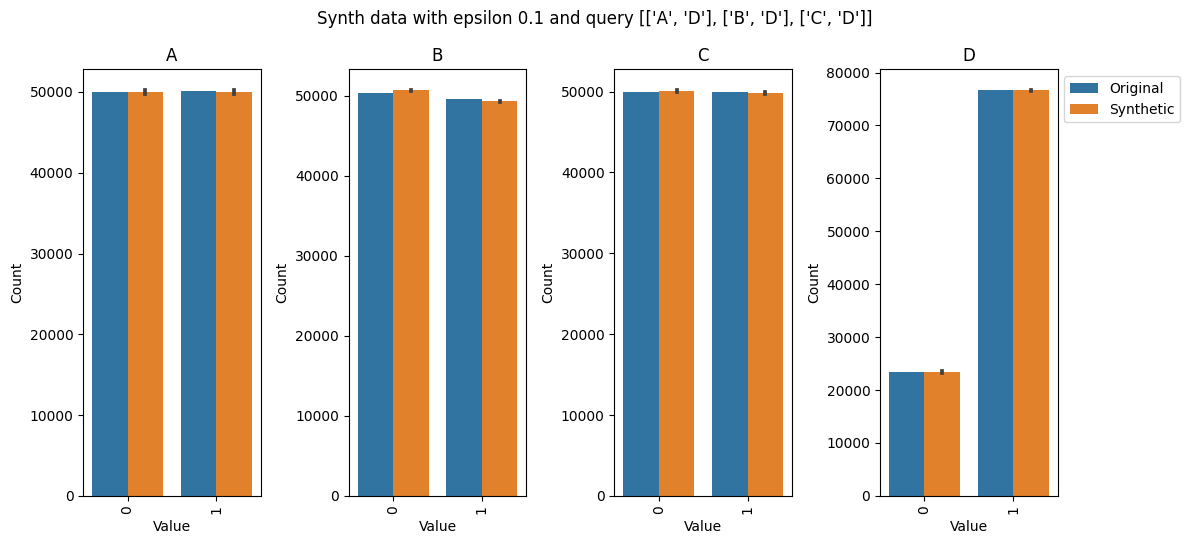

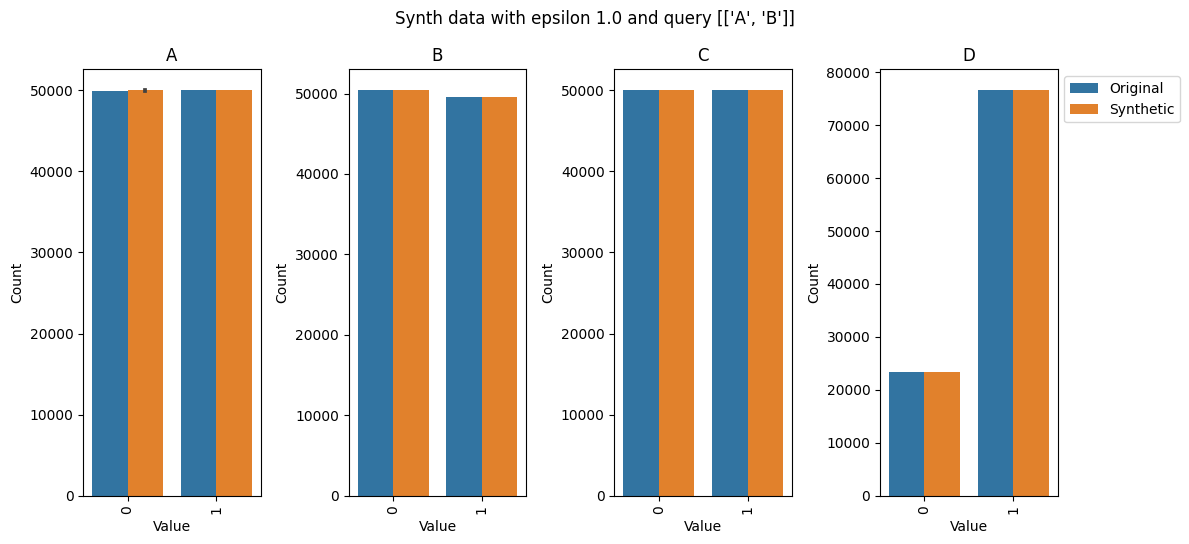

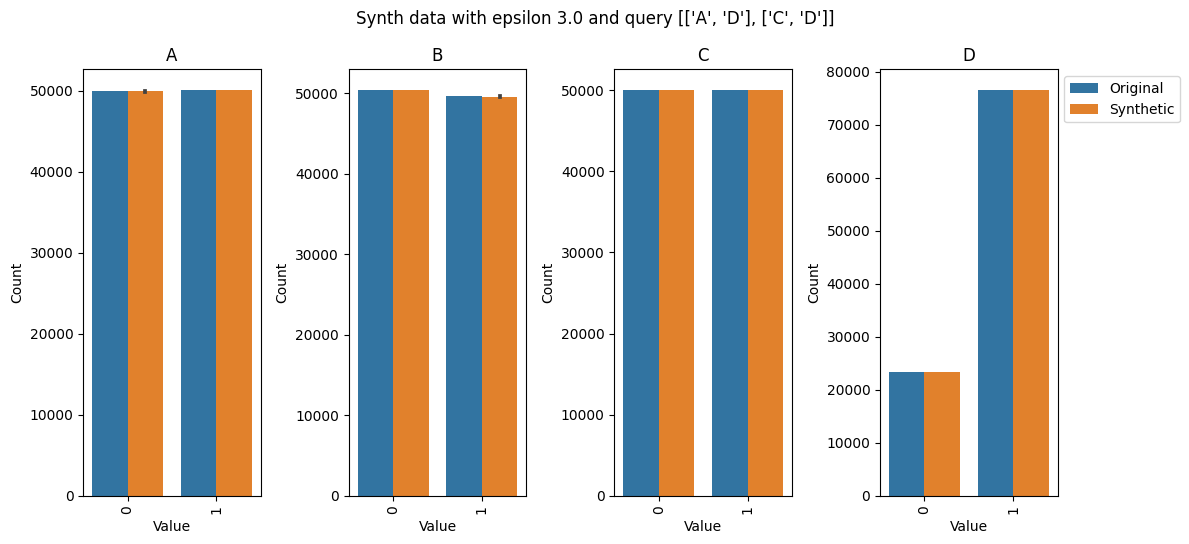

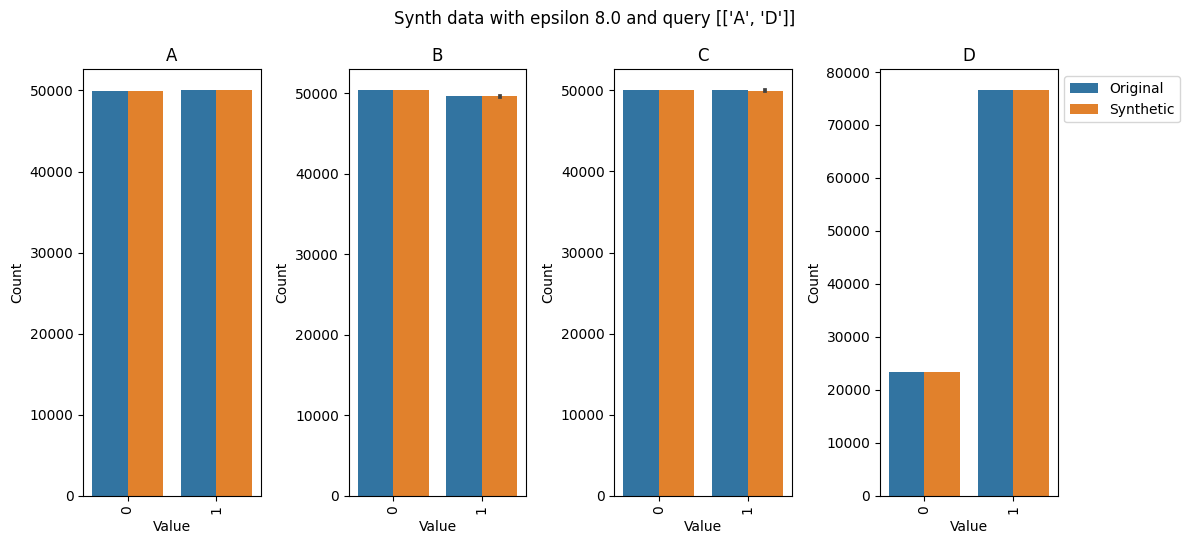

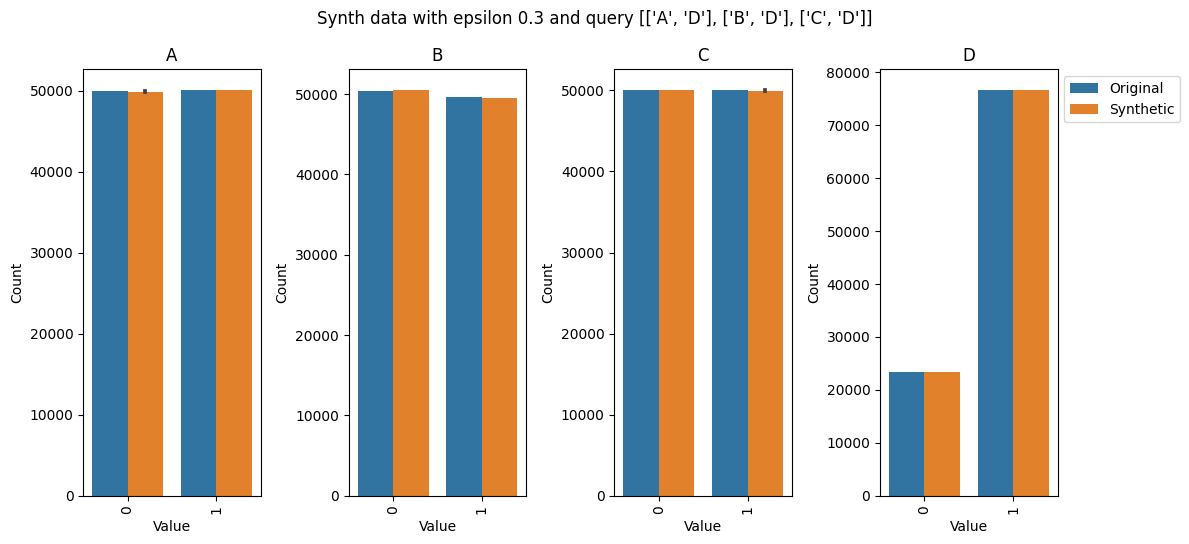

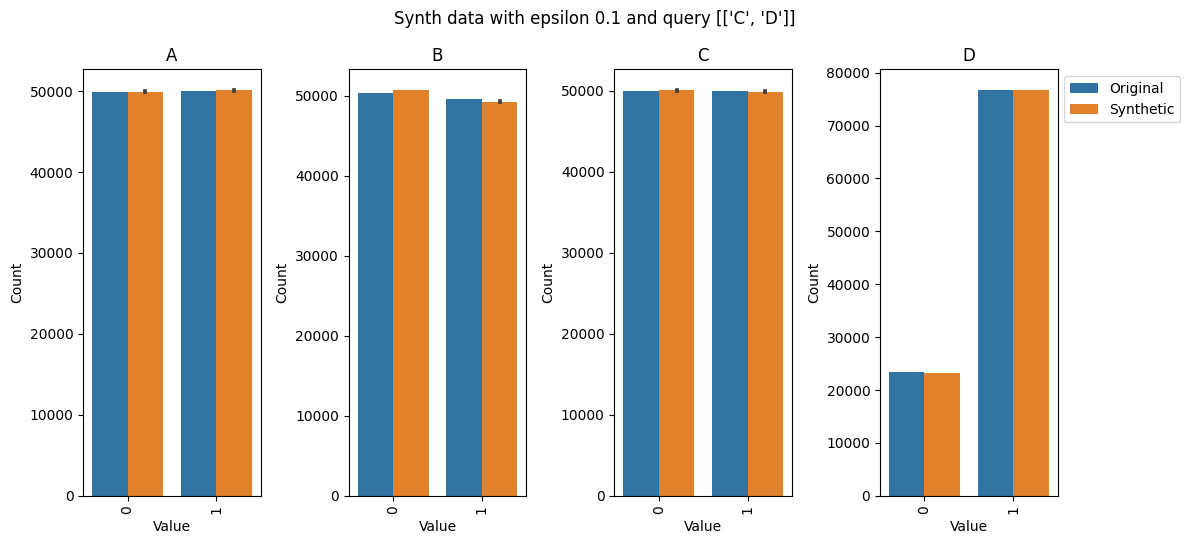

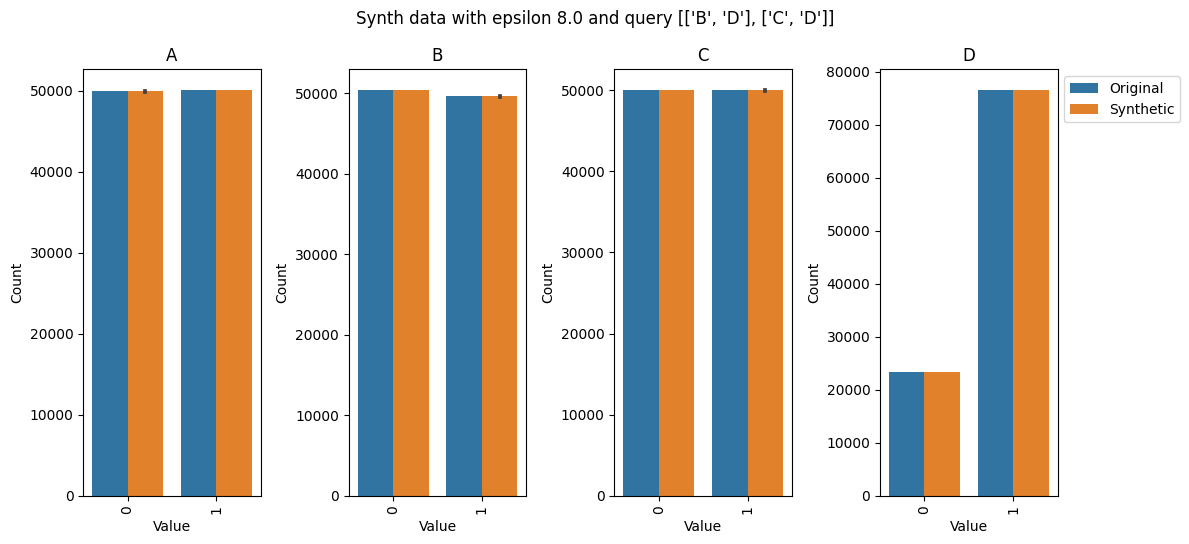

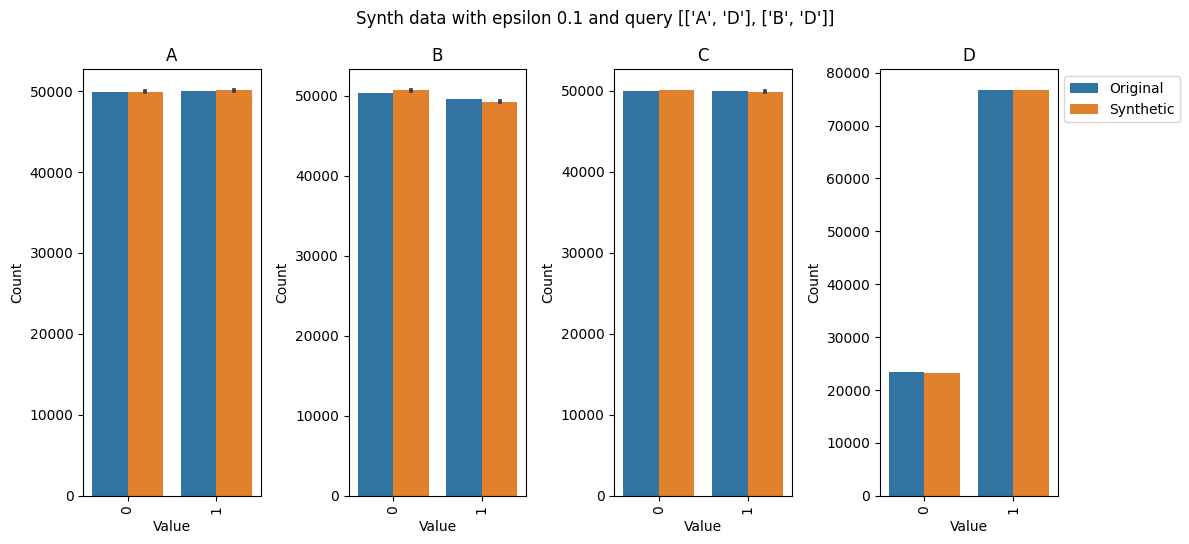

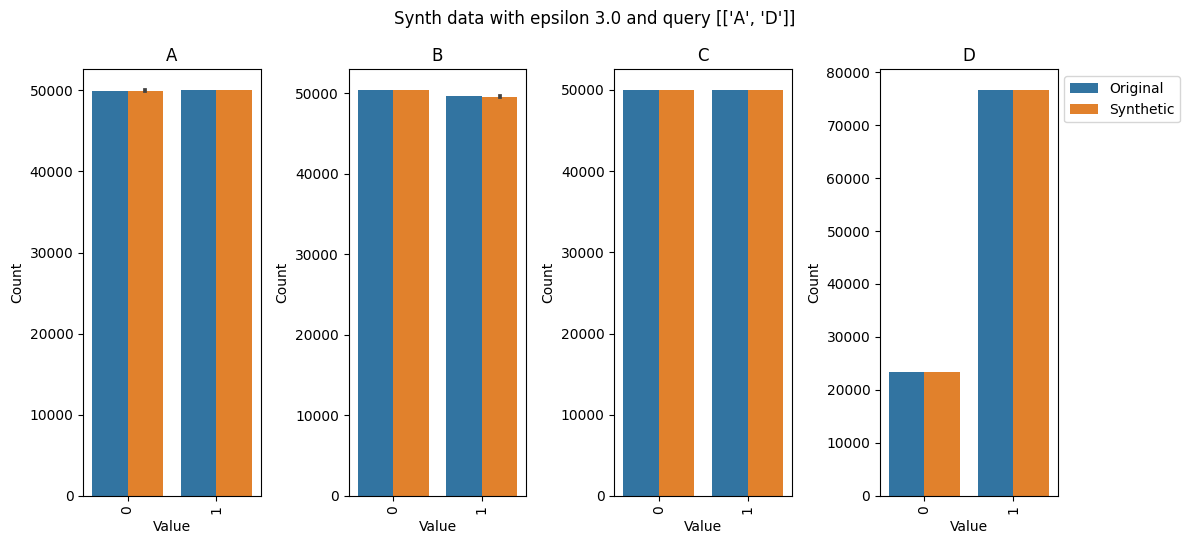

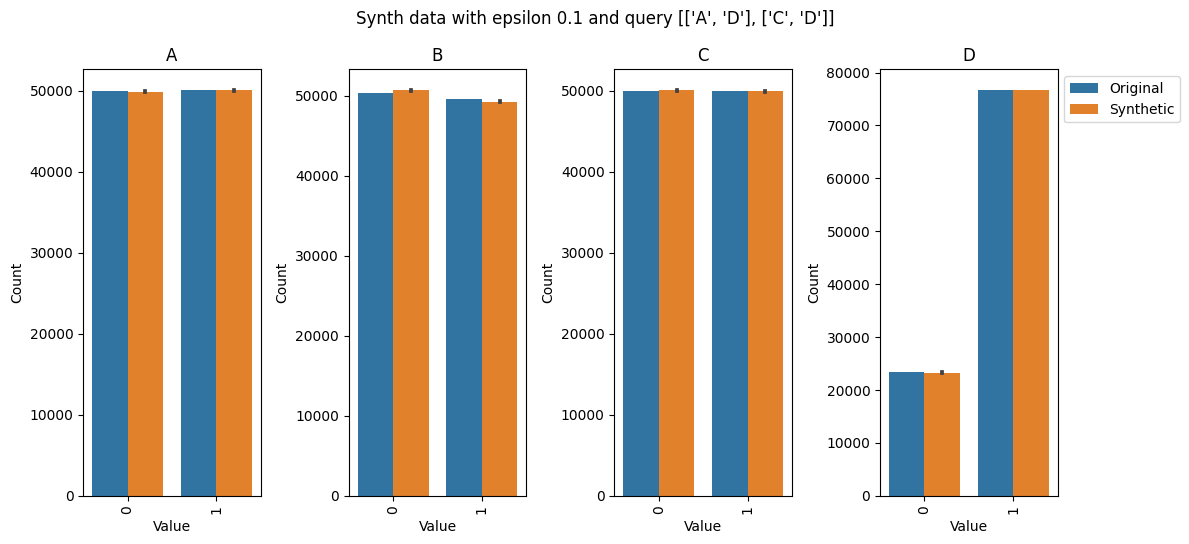

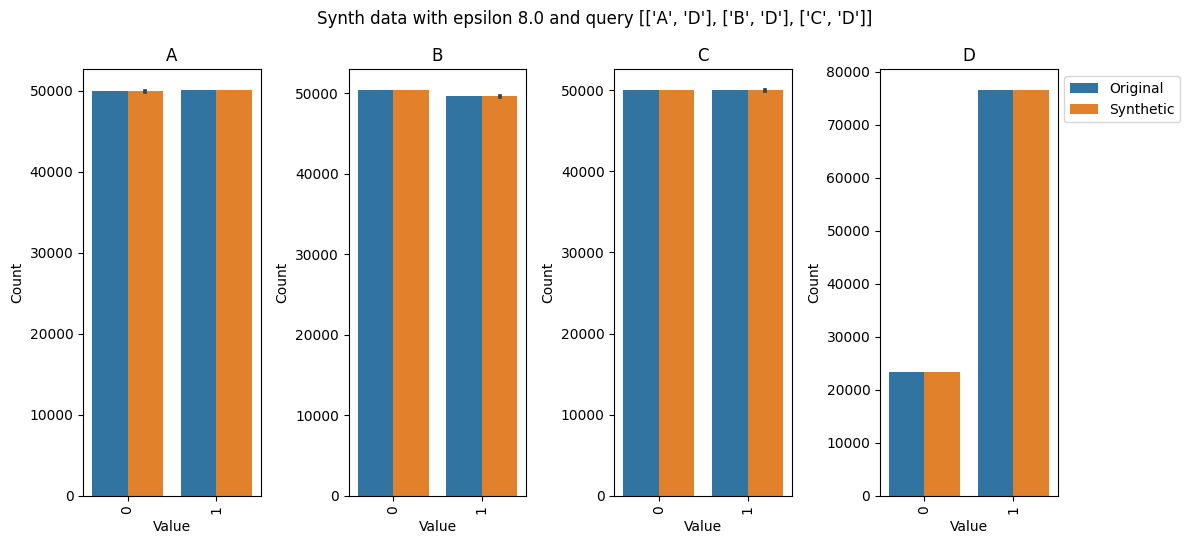

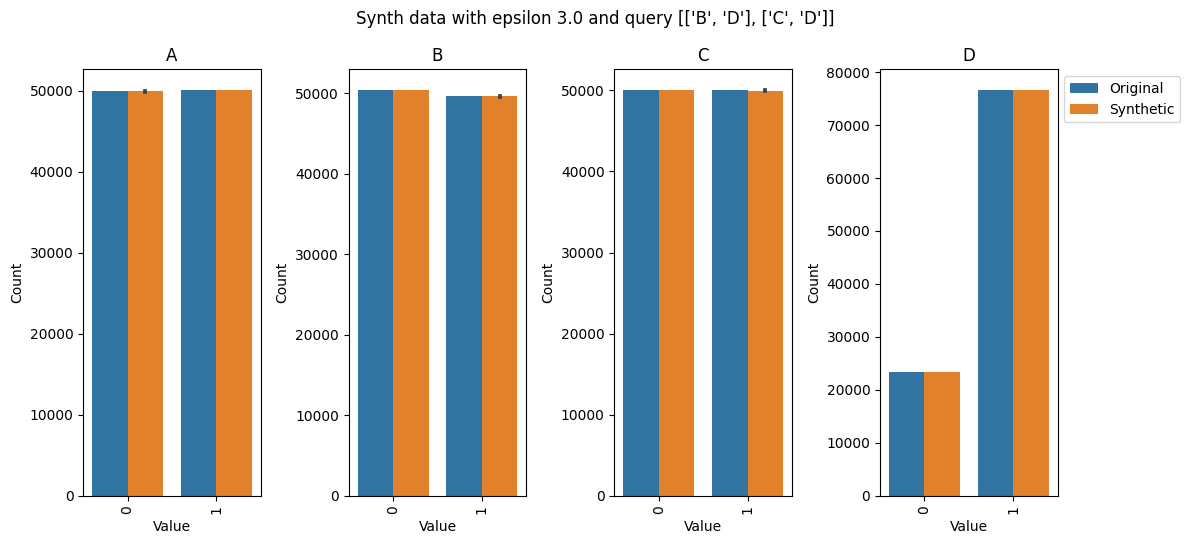

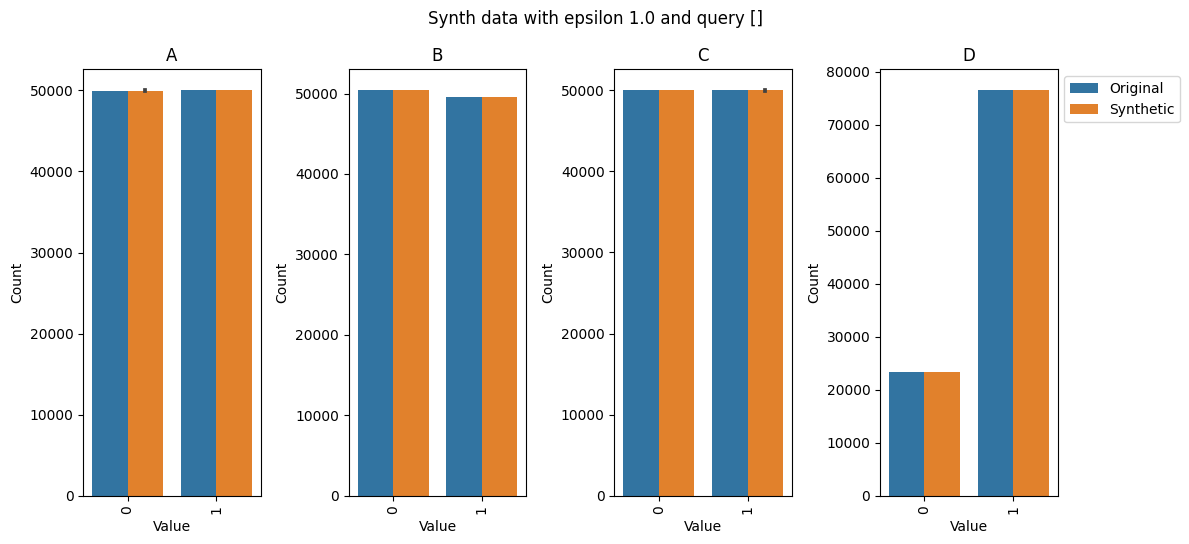

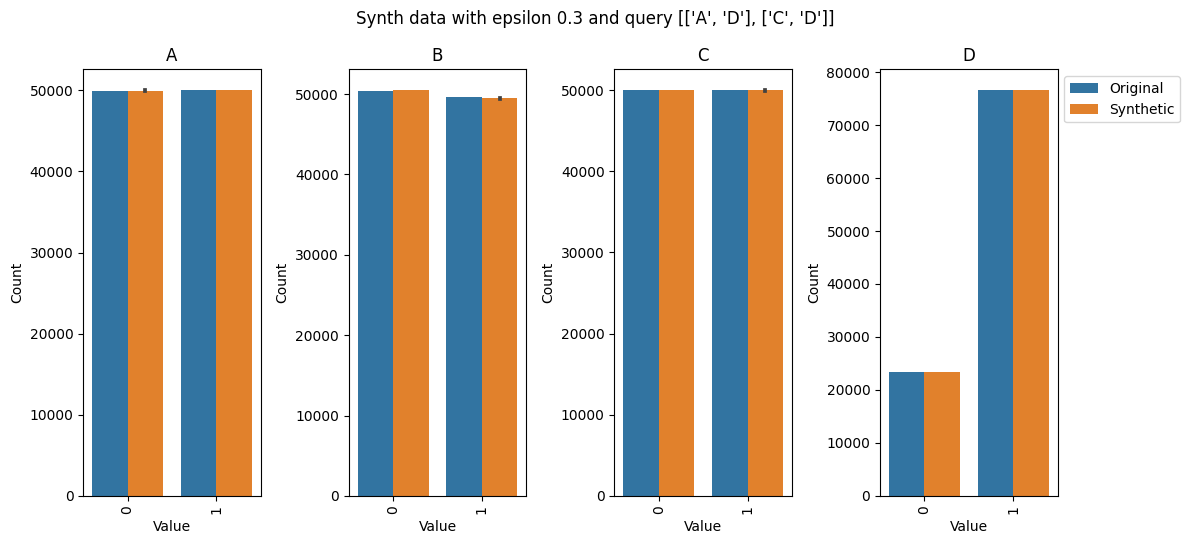

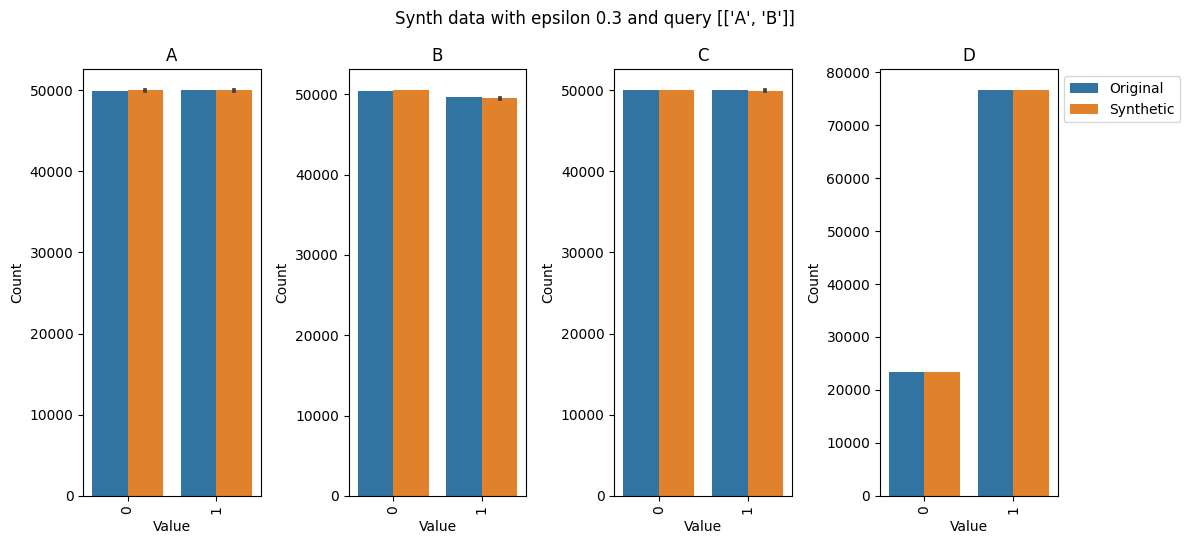

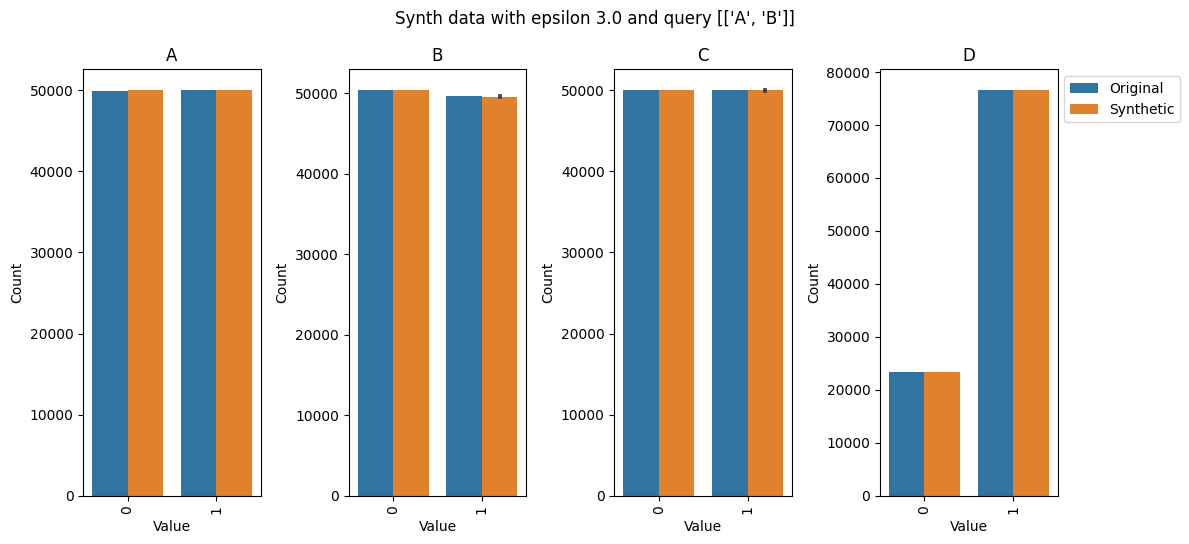

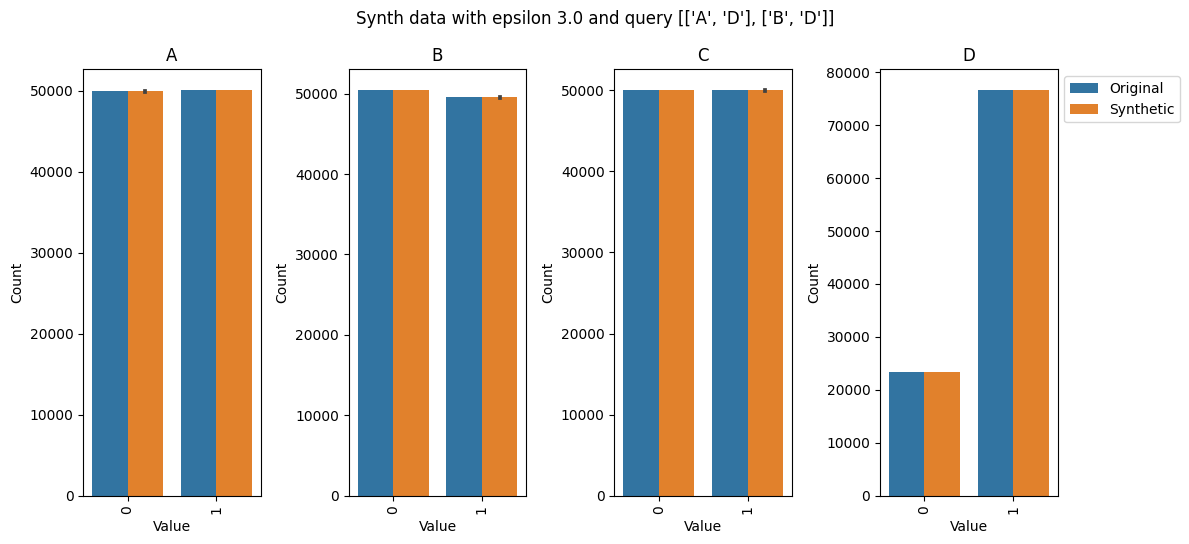

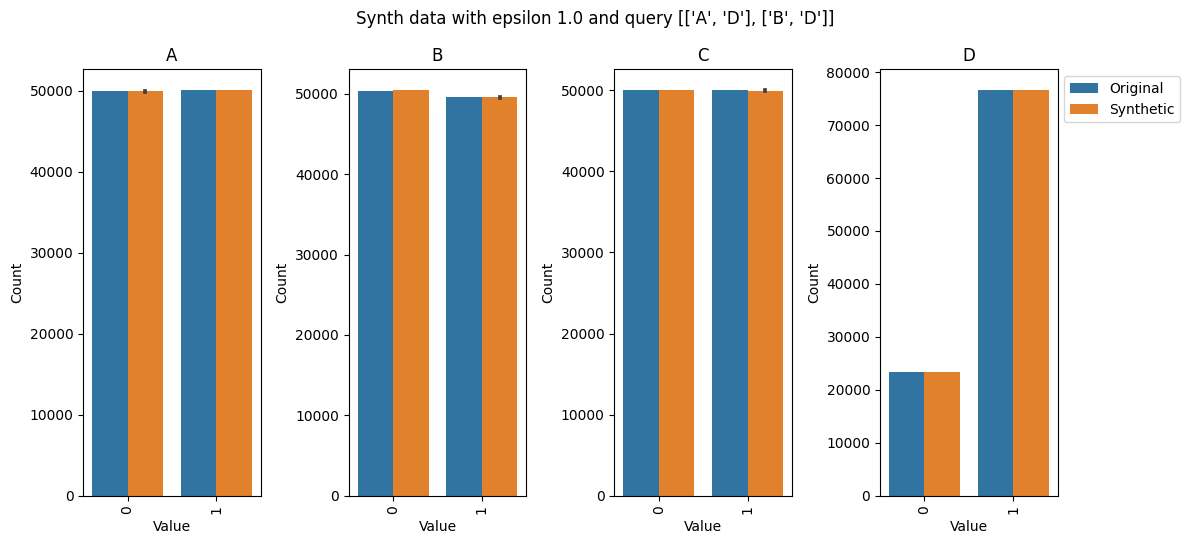

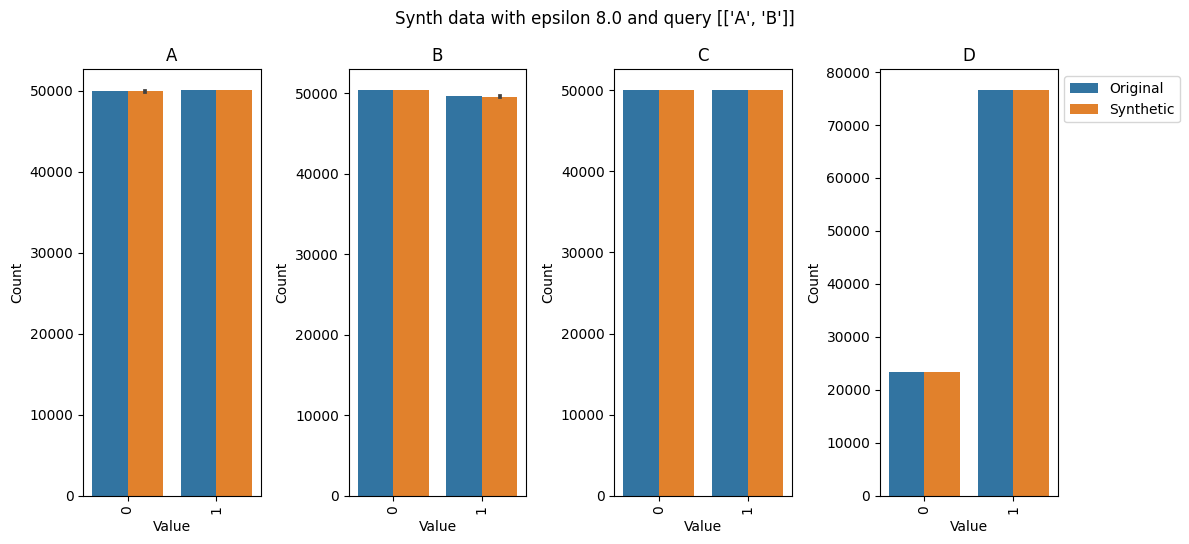

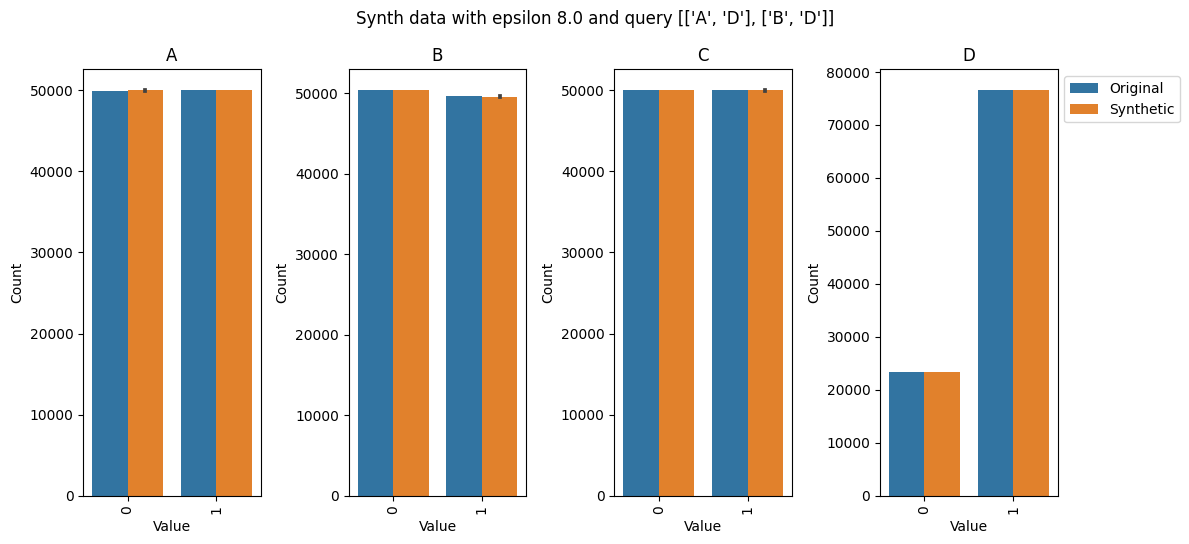

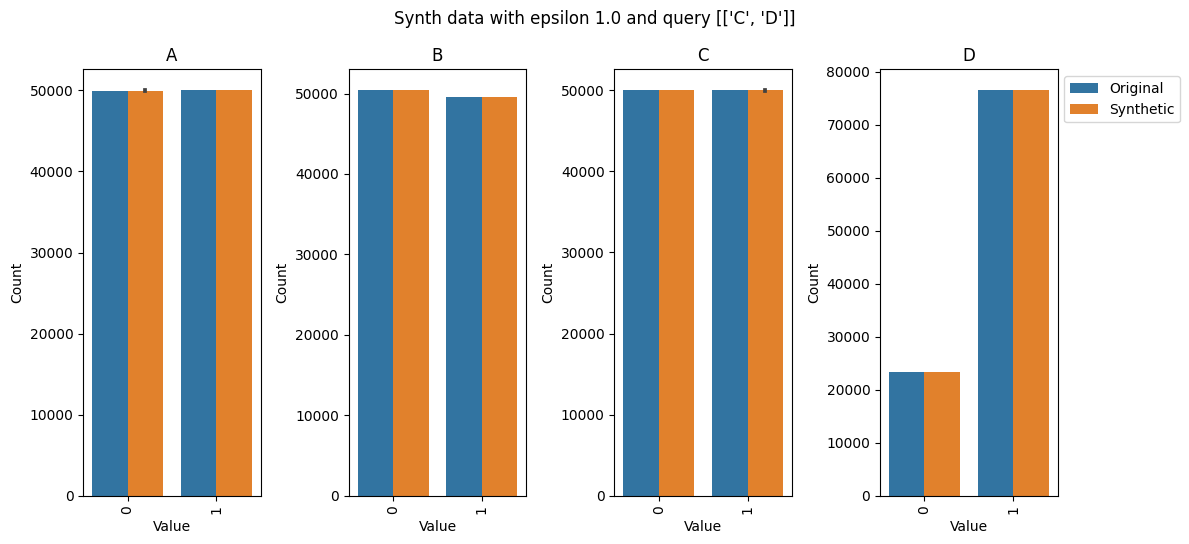

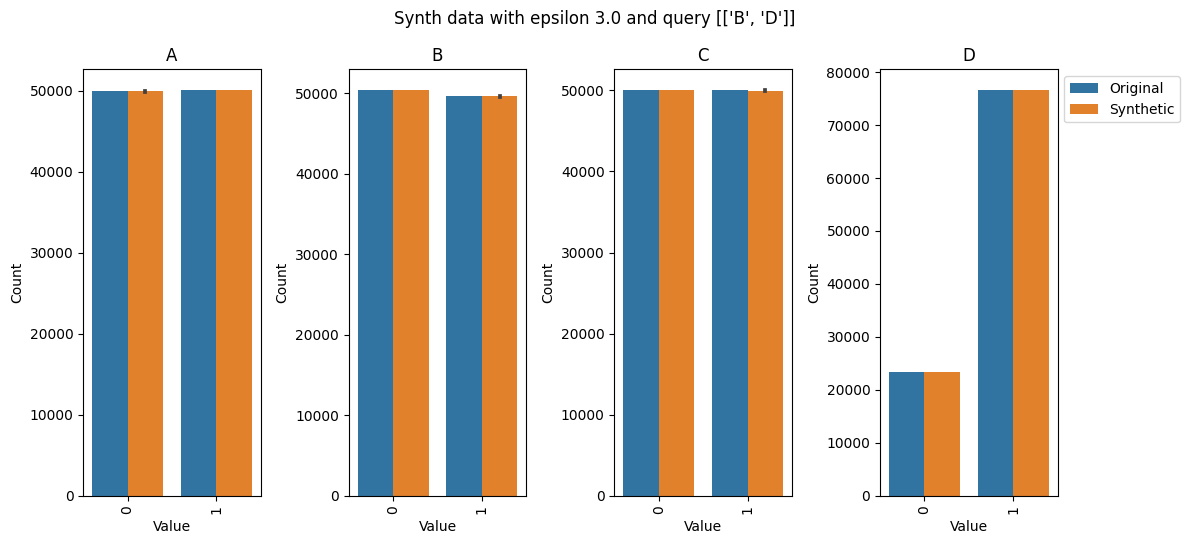

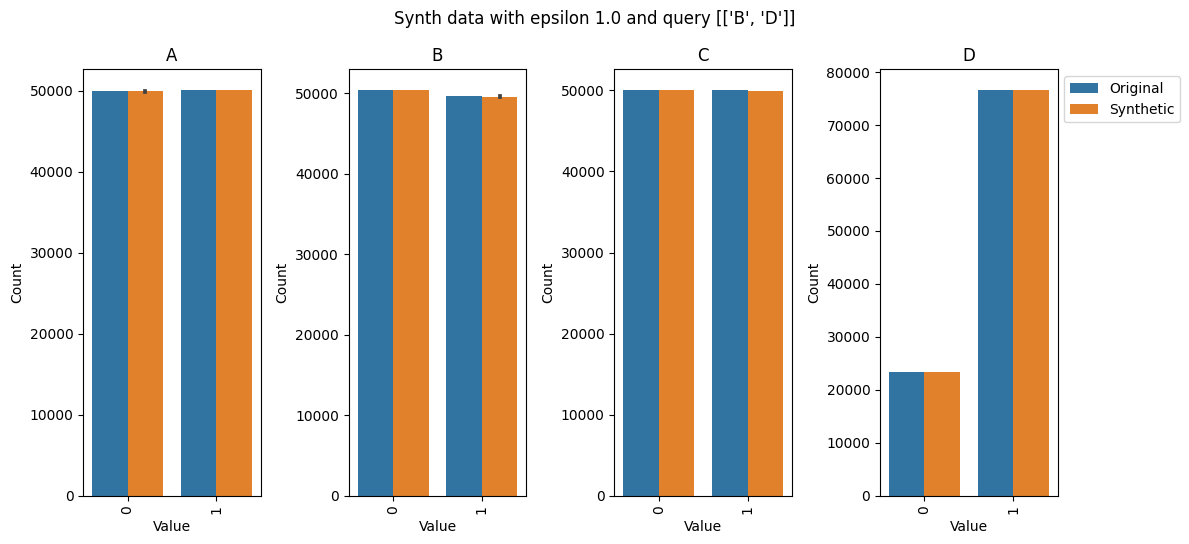

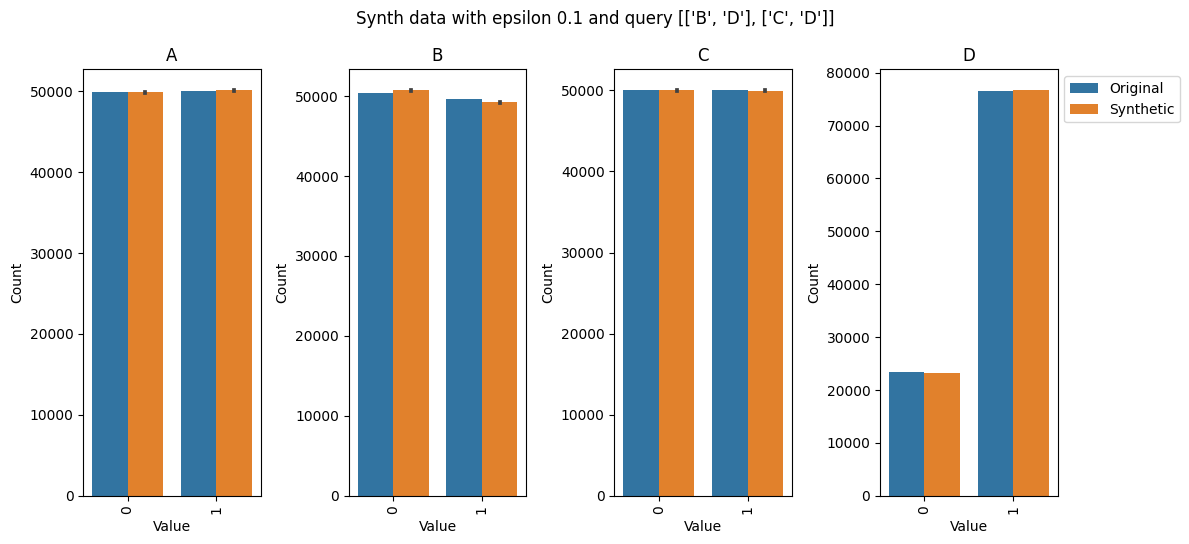

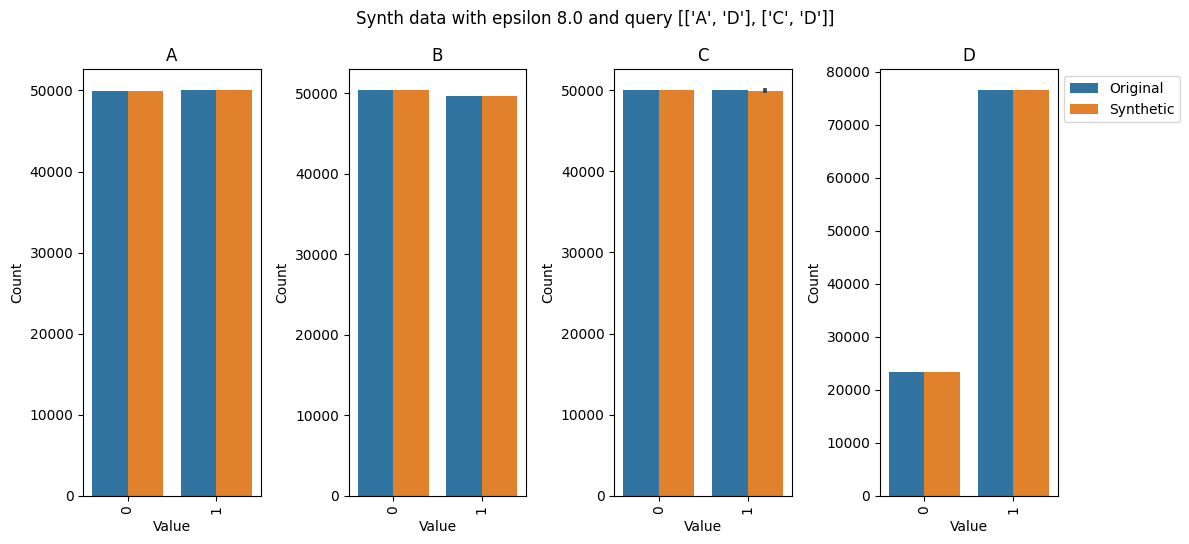

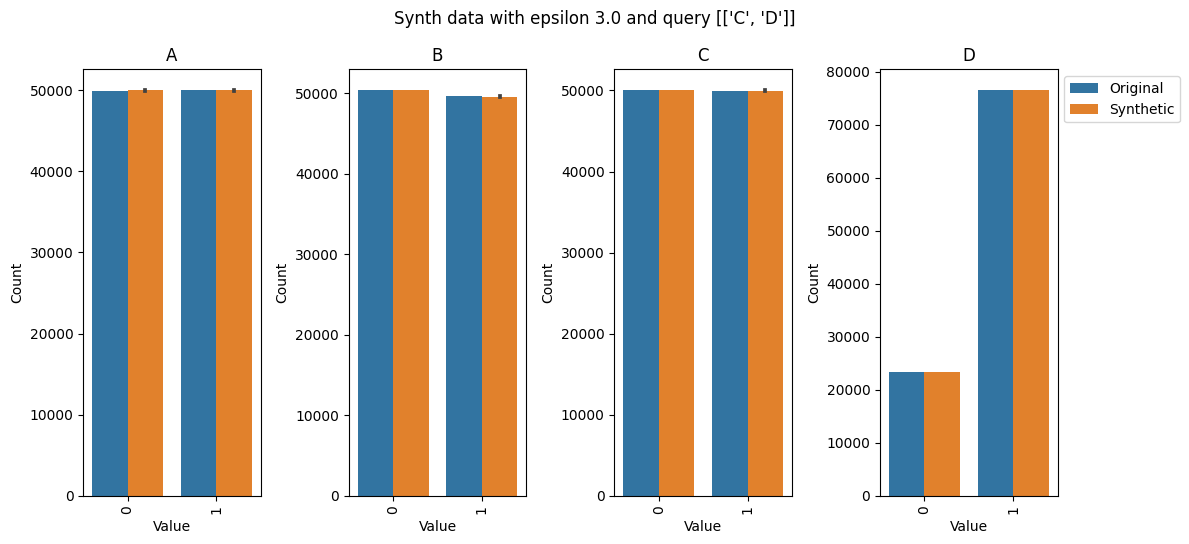

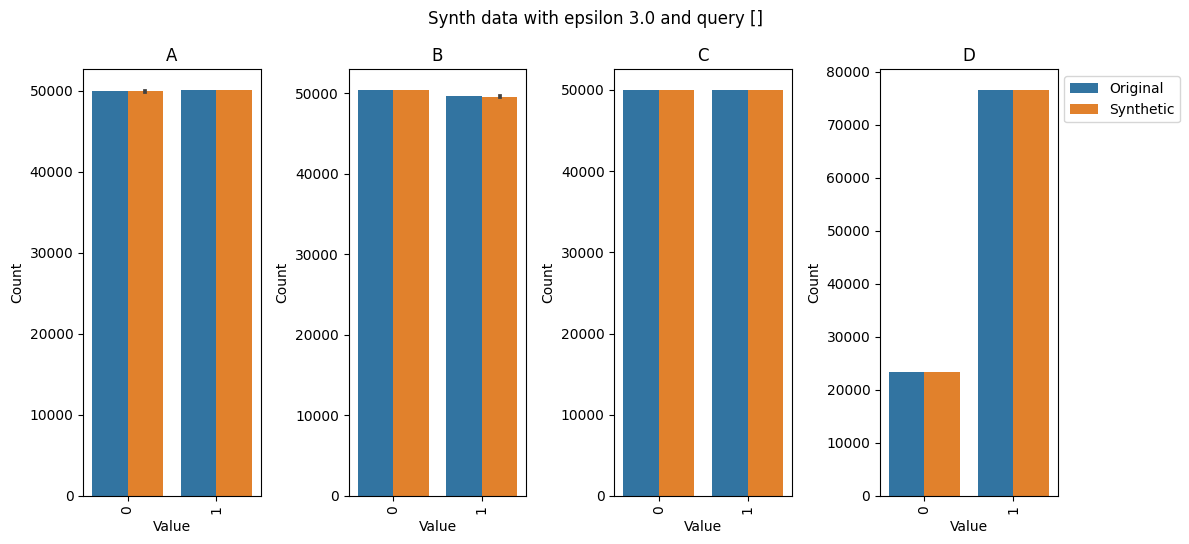

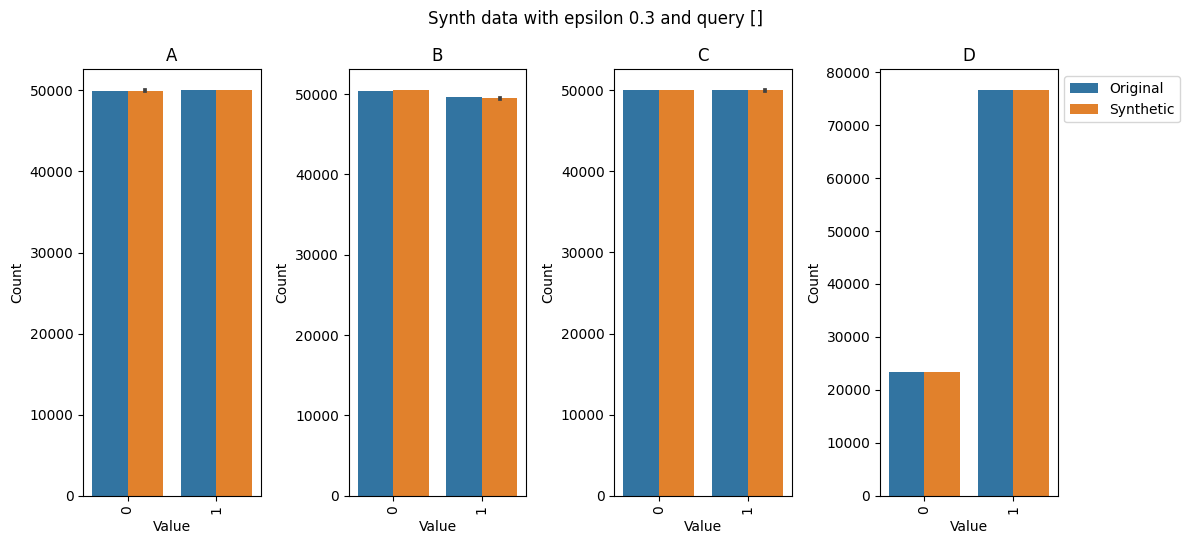

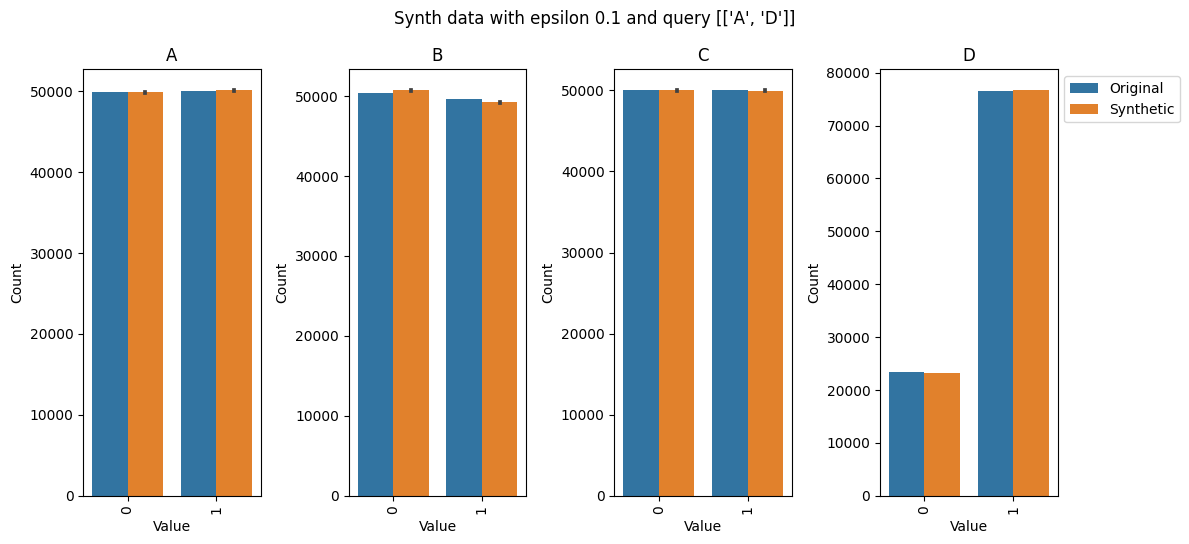

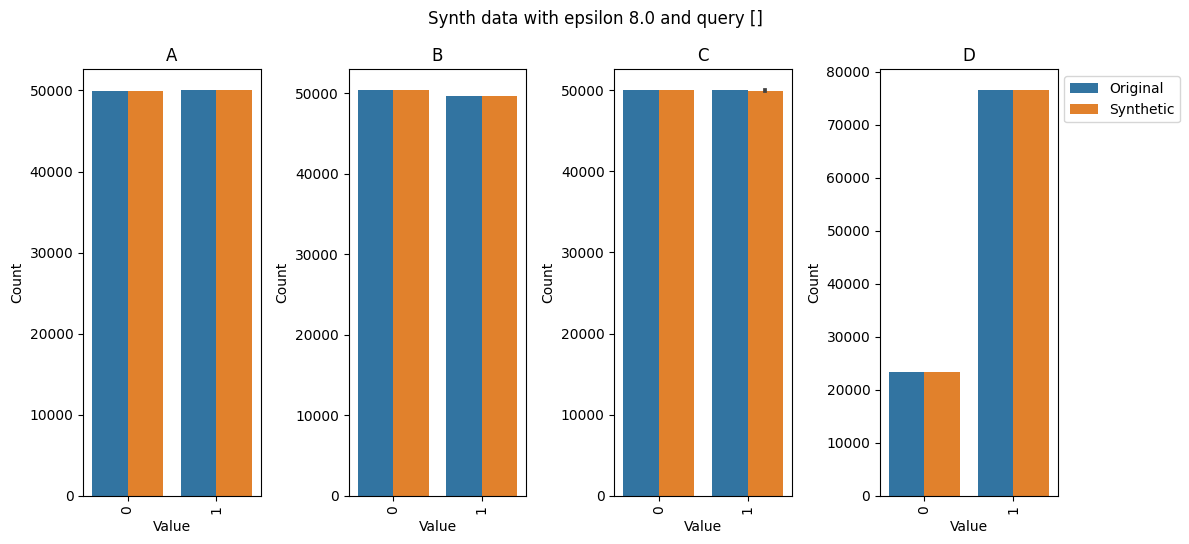

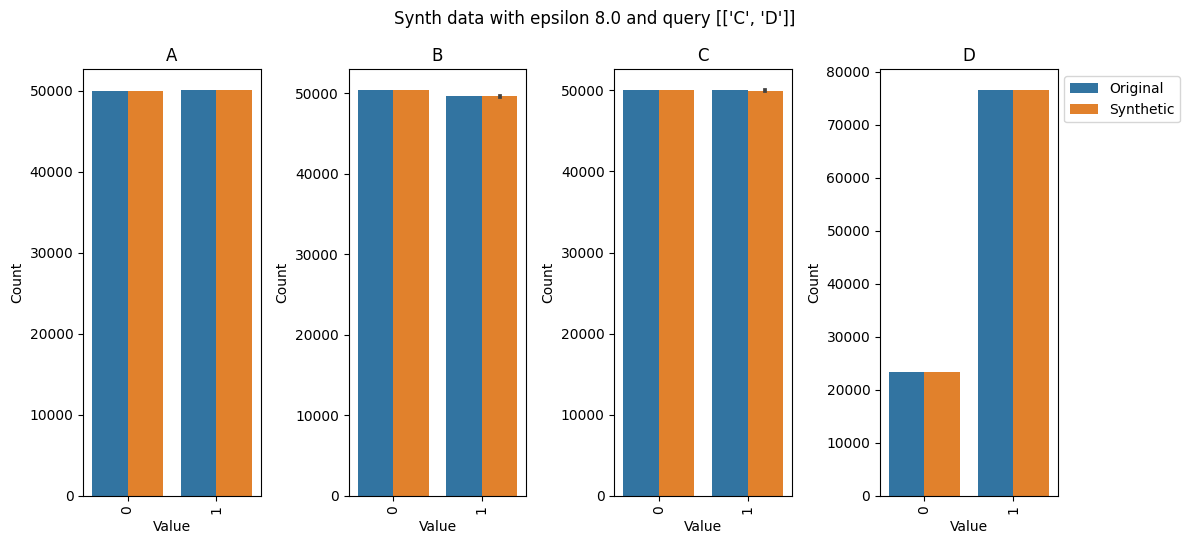

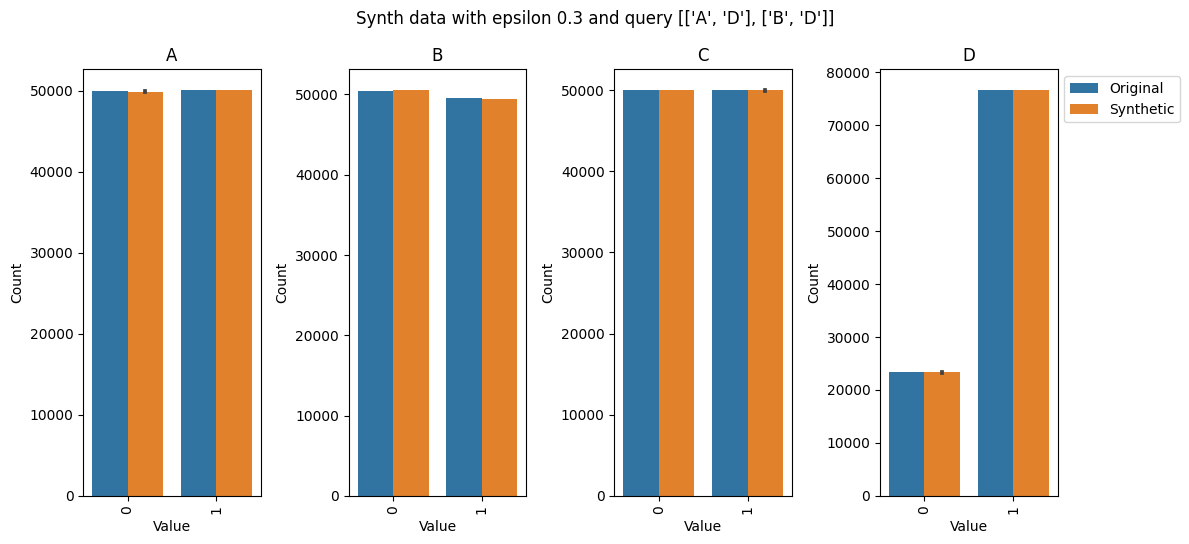

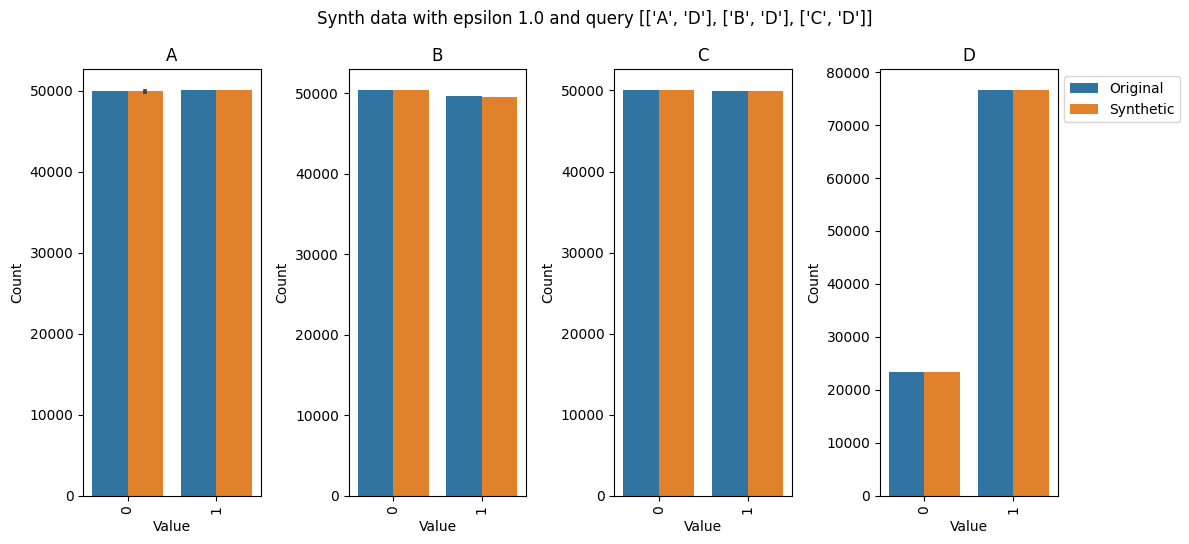

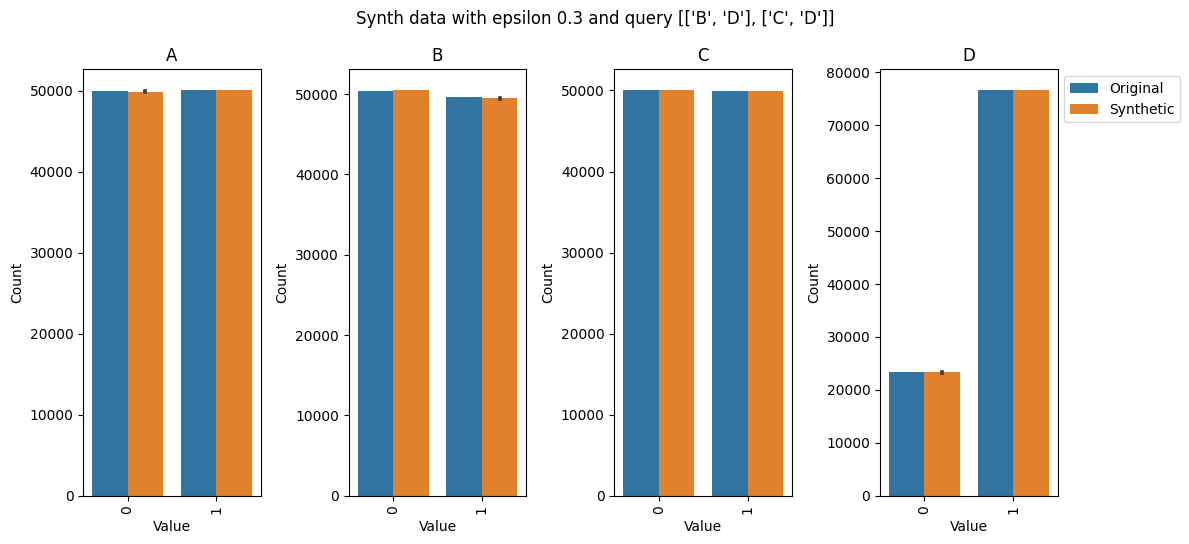

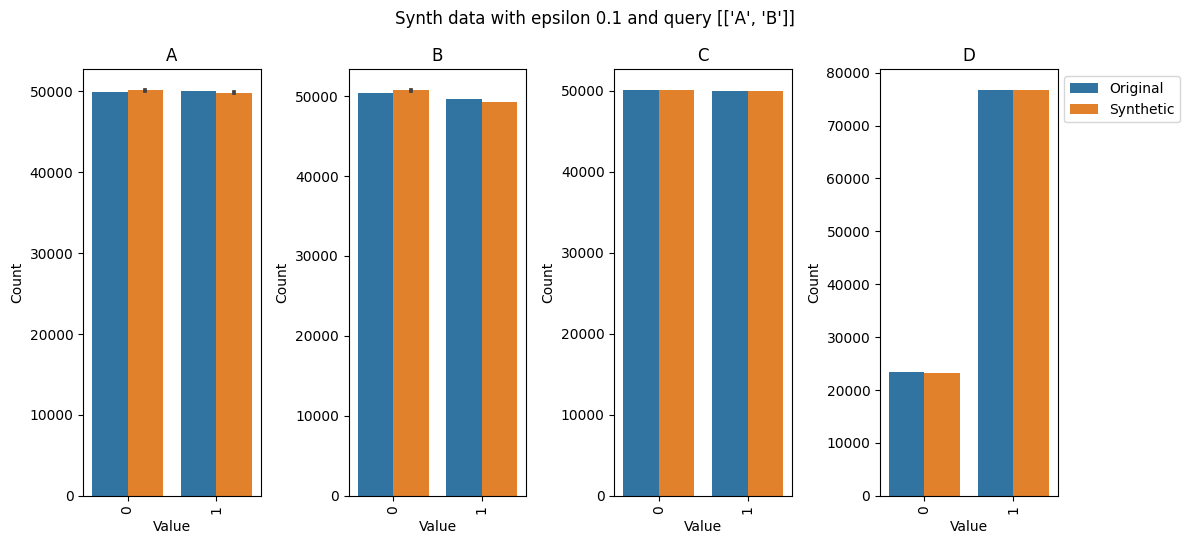

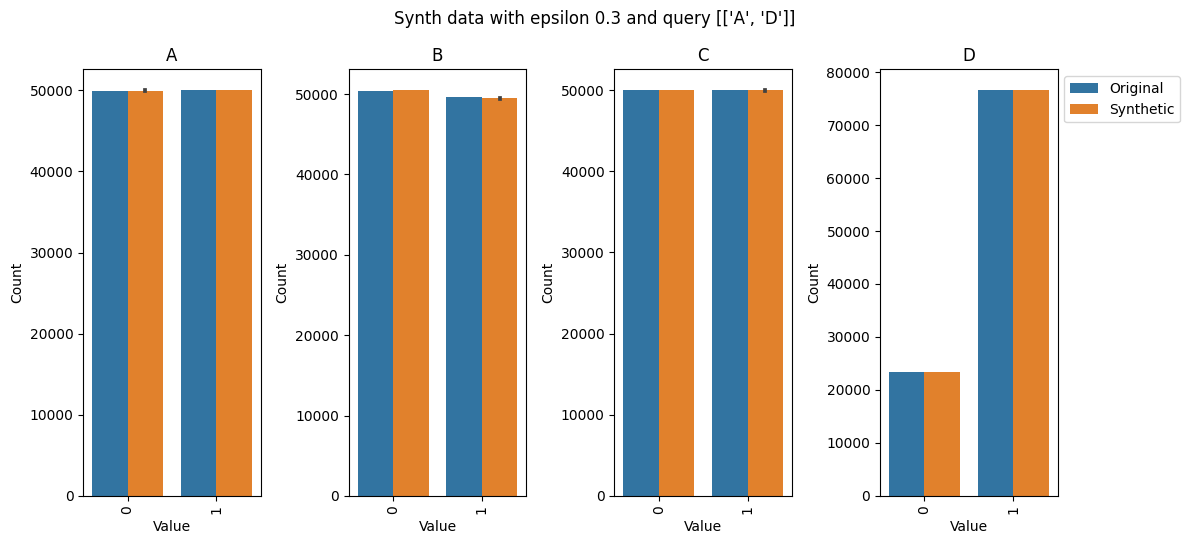

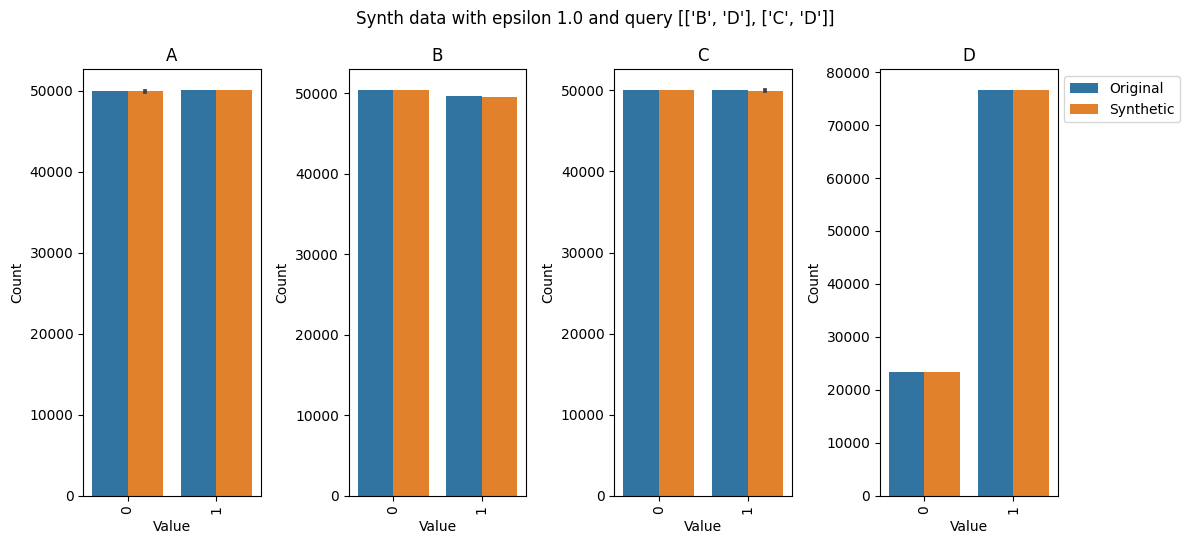

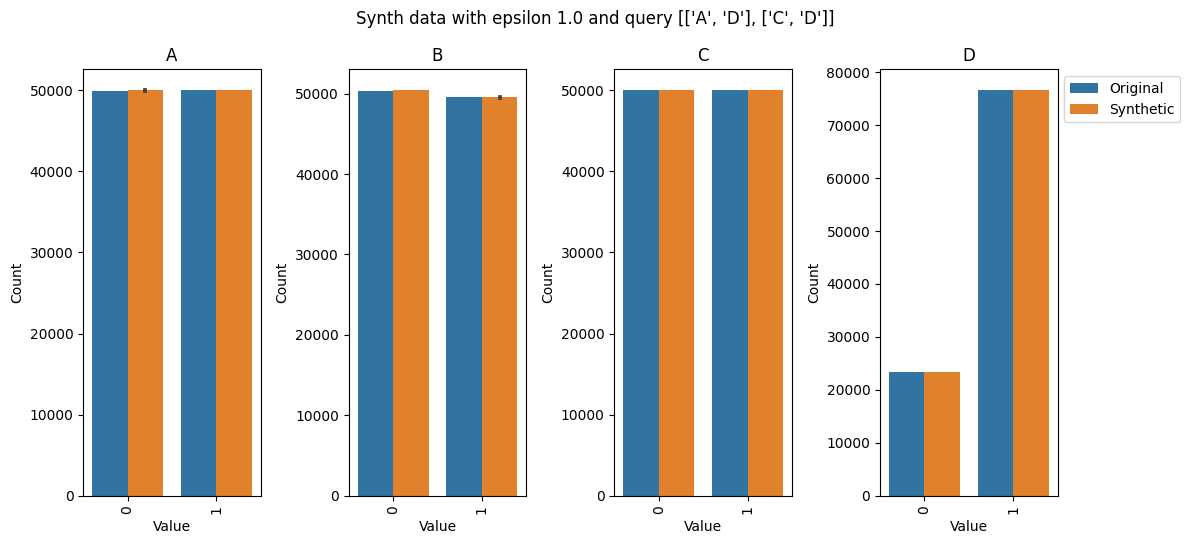

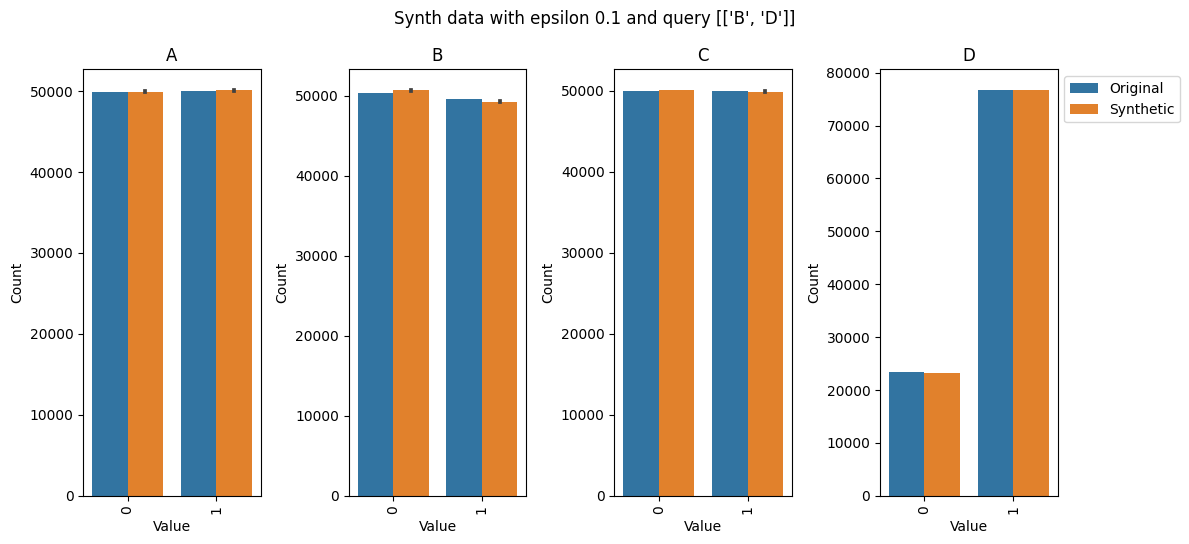

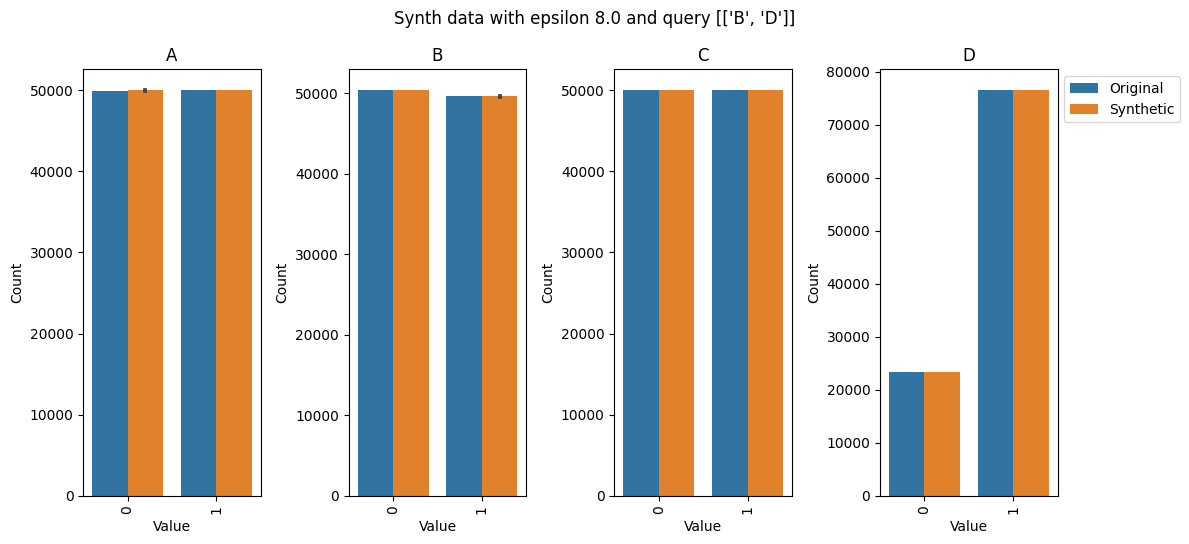

In [11]:
for filename in os.listdir(SYN_DATA_FOLDER):
    if filename[0] == '.' or "binary4d" not in filename:
        continue
    
    synt_data_obj_path = os.path.join(SYN_DATA_FOLDER, filename)
    synt_data_obj = pickle.load(open(synt_data_obj_path, mode="rb"))
    
    original_dataset = synt_data_obj.original_dataset
            
    if original_dataset == 'binary4d':
        df_list = numpy_tensor_to_dataframe_list(synt_data_obj.synth_data, columns=['A', 'B', 'C', 'D'])
        title = f"Synth data with epsilon {synt_data_obj.epsilon} and query {synt_data_obj.queries}"
        plot_dataframe_marginal_comparison(binary4d_df, df_list, title=title)

In [48]:
all_scores = []

for filename in os.listdir(SYN_DATA_FOLDER):
    if filename[0] == '.' or "binary4d" not in filename:
        continue
    
    synt_data_obj_path = os.path.join(SYN_DATA_FOLDER, filename)
    synt_data_obj = pickle.load(open(synt_data_obj_path, mode="rb"))
    
    original_dataset = synt_data_obj.original_dataset
            
    if original_dataset == 'binary4d':

        for dataset in numpy_tensor_to_dataframe_list(synt_data_obj.synth_data):
            dataset.columns = COLUMNS_FOR_DATASET["binary4d"]

            dataset_transformed = transform_for_classification("binary4d", dataset)


            test_df_transformed = transform_for_classification("binary4d", binary4d_test_df)
            target_column_index = test_df_transformed.columns.get_loc("D")

            scores = run_classification(dataset_transformed, test_df_transformed, "D")

            all_scores.append({
                'query' : 
            })


       A  B  C  D
0      1  1  1  1
1      1  0  1  1
2      1  1  1  1
3      1  0  1  1
4      0  0  1  1
...   .. .. .. ..
99995  0  0  0  0
99996  1  0  0  1
99997  0  0  0  1
99998  0  1  0  0
99999  1  0  1  1

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.92240724, 0.03553616, 1.97544556]),
 array([[0.92240724, 0.03553616, 1.97544556]]),
 array([[0.00020992, 0.00018096, 0.00031024]]))
       A  B  C  D
0      1  0  0  0
1      0  1  1  1
2      1  1  1  0
3      0  0  1  1
4      0  1  1  1
...   .. .. .. ..
99995  0  1  0  0
99996  0  0  0  1
99997  0  0  1  1
99998  0  0  0  0
99999  0  1  0  1

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.92600391, 0.05541683, 1.92928489]),
 array([[0.92600391, 0.05541683, 1.92928489]]),
 array([[0.00021045, 0.00017811, 0.00030035]]))
       A  B  C  D
0      0  0  0  1
1      0  1  0  0
2      0  1  1  0
3      1  0  1  1
4      1  1  1  1
...   .. .. .. ..
99995  0  1  1  0
99996  0

(0.76668,
 0.5,
 0.8679330722032287,
 array([0.90589689, 0.04919564, 1.97769444]),
 array([[0.90589689, 0.04919564, 1.97769444]]),
 array([[0.00021009, 0.00017603, 0.00030863]]))
       A  B  C  D
0      1  0  1  1
1      0  0  1  0
2      0  1  1  1
3      0  0  1  1
4      0  0  1  1
...   .. .. .. ..
99995  1  0  1  0
99996  0  0  0  0
99997  0  1  0  0
99998  1  0  0  1
99999  0  1  0  0

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.93369783, 0.06733463, 1.99419384]),
 array([[0.93369783, 0.06733463, 1.99419384]]),
 array([[0.00021272, 0.00018232, 0.00031639]]))
       A  B  C  D
0      0  0  1  1
1      1  1  0  1
2      1  1  1  1
3      1  0  1  1
4      1  1  0  1
...   .. .. .. ..
99995  1  1  1  1
99996  0  0  1  0
99997  1  0  1  1
99998  0  1  1  1
99999  0  0  1  0

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.92351857, 0.0515863 , 1.93337017]),
 array([[0.92351857, 0.0515863 , 1.93337017]]),
 array([[0.00020991, 

3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.92772289, 0.07292397, 1.96614843]),
 array([[0.92772289, 0.07292397, 1.96614843]]),
 array([[0.00021367, 0.00018272, 0.00030871]]))
       A  B  C  D
0      1  1  1  1
1      0  0  0  0
2      1  0  1  1
3      0  0  1  0
4      1  0  1  1
...   .. .. .. ..
99995  0  0  1  1
99996  1  0  1  1
99997  0  0  1  1
99998  1  0  0  0
99999  0  1  0  1

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.93929016, 0.05872528, 1.96332011]),
 array([[0.93929016, 0.05872528, 1.96332011]]),
 array([[0.00021366, 0.00018007, 0.00030874]]))
       A  B  C  D
0      0  0  0  0
1      1  0  1  1
2      0  0  0  1
3      1  0  1  1
4      0  0  0  0
...   .. .. .. ..
99995  1  0  1  1
99996  1  1  0  1
99997  1  1  0  0
99998  1  1  1  1
99999  1  0  0  1

[100000 rows x 4 columns]
3
(0.76668,
 0.5,
 0.8679330722032287,
 array([0.92617109, 0.05101536, 1.94749889]),
 array([[0.92617109, 0.05101536, 1.94749889]]),
 array([[0.00021145

KeyboardInterrupt: 

In [49]:
original_dataset_transformed = transform_for_classification("binary4d", binary4d_df)
scores = run_classification(original_dataset_transformed, test_df_transformed, "D")
pprint(scores)

[('DummyClassifier', 0.76668, 0.5, 0.8679330722032287),
 ('GradientBoostingClassifier',
  0.76686,
  0.6862011706663631,
  0.8463373802085392),
 ('LGBMClassifier', 0.76686, 0.6862011706663631, 0.8463373802085392),
 ('XGBClassifier', 0.76686, 0.6862011706663631, 0.8463373802085392),
 ('RandomForestClassifier', 0.76686, 0.6862011706663631, 0.8463373802085392),
 ('LinearSVC', 0.76668, 0.5, 0.8679330722032287),
 ('MLPClassifier', 0.76668, 0.5, 0.8679330722032287)]
